**В домашней работе необходимо выполнить следующее задание:**

1. Используя предложенный [датасет](https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv) японских машин, обучите модель предсказывать цены на японские автомобили.
2. Создайте обучающую, тестовую и проверочную выборки.
3. Оцените качество работы созданной сети, определите средний процент ошибки на проверочной выборке.
4. В качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse).
5. Выполнив задание, получите 3 балла.
6. Хотите 4 балла? Добейтесь ошибки менее 10%.
7. Хотите 5 баллов? Добейтесь ошибки менее 5%.


**Примечание**. Подробную информацию о датасете можно узнать на портале соревновани [kaggle.com](https://www.kaggle.com/datasets/doaaalsenani/used-cars-dataets/data).



In [ ]:
!wget https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv

--2025-03-12 10:23:53--  https://storage.yandexcloud.net/academy.ai/japan_cars_dataset.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136735 (134K) [text/csv]
Saving to: ‘japan_cars_dataset.csv.1’

japan_cars_dataset. 100%[===================>] 133.53K  --.-KB/s    in 0.1s    

2025-03-12 10:23:54 (974 KB/s) - ‘japan_cars_dataset.csv.1’ saved [136735/136735]



In [ ]:
import pandas as pd
import numpy as np
from keras import utils
from keras.src.layers import Dense, Dropout, BatchNormalization
from keras.src.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import models
from tensorflow.keras import initializers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from keras.layers import LSTM
from keras.regularizers import L1L2

In [ ]:
cars = pd.read_csv('japan_cars_dataset.csv', sep=',')

# Удалим строки с пустыми значениями
cars = cars.dropna()

# Выводим первые 10 машин
cars.head(10)

,Unnamed: 0,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,5,190,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,8,220,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,9,230,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,10,275,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,11,283,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:
price = cars['price']
cars.drop(['Unnamed: 0', 'price'], inplace=True, axis=1)

In [ ]:
cars.head(10)

,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
5,daihatsu,mira,2004,81400,660,at,2wd,rhd,gasoline
6,nissan,march,2010,117000,1200,at,2wd,rhd,gasoline
7,volkswagen,passat,2008,127763,3190,at,4wd,rhd,gasoline
8,mazda,bongo van,2010,178218,1800,mt,2wd,rhd,gasoline
9,honda,step wgn,2005,121655,2000,at,2wd,rhd,gasoline


In [ ]:
def range2int(param, class_list):
    # Определение размерности выходного вектора, как число уникальных классов
    num_classes = len(class_list) - 1
    x_data = []

    for row in param:
        for i in range(num_classes):
            if class_list[i] <= float(row) < class_list[i + 1]:
                cls = i  # Интервал найден, выбор класса
                break
        else:
            cls = num_classes - 1  # Интервал не найден, выбор последнего класса

        x_data.append(cls)

    return np.array(x_data)

In [ ]:
# Разбиваем столбец mileage на диапазоны
mileage_step = 5000
mileage_range = list(range(cars.mileage.min(), cars.mileage.max() + mileage_step, mileage_step))

In [ ]:
print(mileage_range)

[2000, 7000, 12000, 17000, 22000, 27000, 32000, 37000, 42000, 47000, 52000, 57000, 62000, 67000, 72000, 77000, 82000, 87000, 92000, 97000, 102000, 107000, 112000, 117000, 122000, 127000, 132000, 137000, 142000, 147000, 152000, 157000, 162000, 167000, 172000, 177000, 182000, 187000, 192000, 197000, 202000, 207000, 212000, 217000, 222000, 227000, 232000, 237000, 242000, 247000, 252000, 257000, 262000, 267000, 272000, 277000, 282000, 287000, 292000, 297000, 302000, 307000, 312000, 317000, 322000, 327000, 332000, 337000, 342000, 347000, 352000, 357000, 362000, 367000, 372000, 377000, 382000, 387000, 392000, 397000, 402000, 407000, 412000, 417000, 422000, 427000, 432000, 437000, 442000, 447000, 452000, 457000, 462000, 467000, 472000, 477000, 482000, 487000, 492000, 497000, 502000, 507000, 512000, 517000, 522000, 527000, 532000, 537000, 542000, 547000, 552000, 557000, 562000, 567000, 572000, 577000, 582000, 587000, 592000, 597000, 602000, 607000, 612000, 617000, 622000, 627000, 632000, 63700

In [ ]:
# Переведем табличные данные в числовые признаки
label = LabelEncoder()
for col in cars.columns:
    if col == 'mileage':
        cars.mileage = range2int(cars.mileage, mileage_range) # функция для создания диапазона
    else:
        cars[col] = label.fit_transform(cars[col].astype('str'))

In [ ]:
cars.head(10)

,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,19,143,17,15,4,0,0,2,2
1,19,143,24,10,2,0,0,2,2
2,19,134,19,9,47,0,0,2,2
3,25,29,22,25,42,0,0,2,2
4,4,155,20,12,87,0,0,2,2
5,4,155,18,15,87,0,0,2,2
6,19,143,24,23,2,0,0,2,2
7,26,180,22,25,76,0,1,2,2
8,15,42,24,35,37,2,0,2,2
9,8,212,19,23,47,0,0,2,2


In [ ]:
# Переводим столбцы в one hot encoding-вектора и объединяем их
x_data = np.concatenate([utils.to_categorical(cars[col], cars[col].max() + 1) for col in cars], axis=1)

In [ ]:
print(x_data.shape)

(2318, 581)


In [ ]:
# Нормализация данных
y_scaler = StandardScaler()
# Нормализация выходных данных по стандартному нормальному распределению
y_data = np.array(price).reshape(-1, 1)
y_data_scaled = y_scaler.fit_transform(y_data)

In [ ]:
model = models.Sequential()
model.add(LSTM(64, input_shape=(x_data.shape[1], 1)))
model.add(Dropout(0.3))
model.add(Dense(512, activation='tanh', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=L1L2(l1=0.01, l2=0.01)))
model.add(Dropout(0.3))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(x_data, y_data_scaled, test_size=0.1)

In [ ]:
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(2086, 581) (232, 581) (2086, 1) (232, 1)


In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

history = model.fit(train_X, train_y, batch_size=128, epochs=400, validation_split=0.1)

Epoch 1/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 110.4366 - mae: 0.8390 - val_loss: 110.2449 - val_mae: 0.8674
Epoch 2/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 110.0985 - mae: 0.8314 - val_loss: 109.9080 - val_mae: 0.8674
Epoch 3/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 109.8079 - mae: 0.8506 - val_loss: 109.5716 - val_mae: 0.8675
Epoch 4/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 109.4104 - mae: 0.8272 - val_loss: 109.2358 - val_mae: 0.8675
Epoch 5/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 109.1211 - mae: 0.8460 - val_loss: 108.9007 - val_mae: 0.8675
Epoch 6/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 108.7881 - mae: 0.8494 - val_loss: 108.5661 - val_mae: 0.8675
Epoch 7/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 108.4417 - mae: 0.8413 - val_loss: 108.2321 - val_mae: 0.8675
Epoch 8/400
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 108.1217 - mae: 0.8440 - val_loss: 107.8987 - val_mae: 0.8675
Epoch 9/400
15/15 ━━━━━━

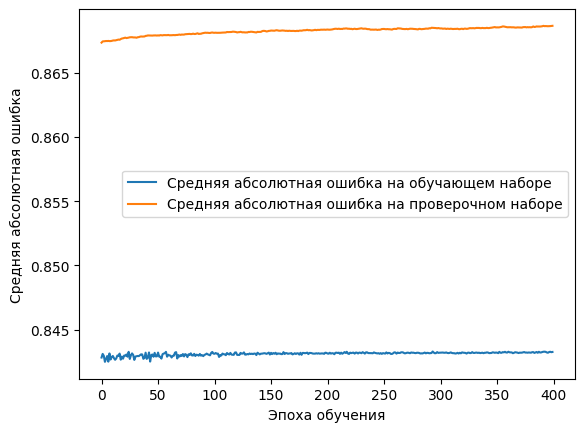

In [ ]:
plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Средняя абсолютная ошибка: 230.96978943923423 

Реальное значение: 1110.00  Предсказанное значение: 969.09  Разница: 140.91
Реальное значение: 850.00  Предсказанное значение: 969.09  Разница: 119.09
Реальное значение: 830.00  Предсказанное значение: 969.09  Разница: 139.09
Реальное значение: 825.00  Предсказанное значение: 969.09  Разница: 144.09
Реальное значение: 600.00  Предсказанное значение: 969.09  Разница: 369.09
Реальное значение: 950.00  Предсказанное значение: 969.09  Разница:  19.09
Реальное значение: 620.00  Предсказанное значение: 969.09  Разница: 349.09
Реальное значение: 1300.00  Предсказанное значение: 969.09  Разница: 330.91
Реальное значение: 550.00  Предсказанное значение: 969.09  Разница: 419.09
Реальное значение: 1380.00  Предсказанное значение: 969.09  Разница: 410.91


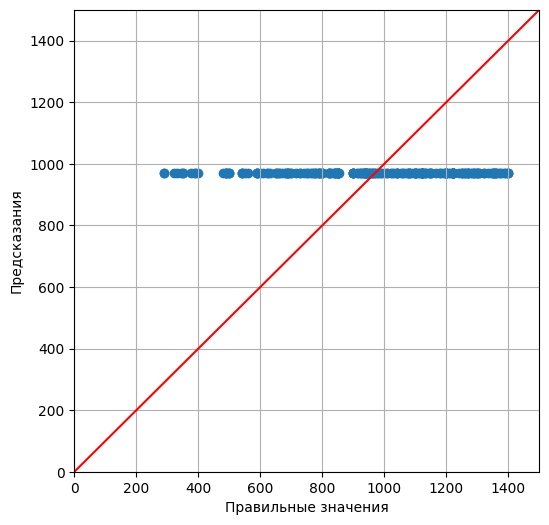

In [ ]:
pred = model.predict(test_X)
pred = y_scaler.inverse_transform(pred)  # Обратная нормированию процедура
test_y = y_scaler.inverse_transform(test_y)

print('Средняя абсолютная ошибка:', mean_absolute_error(pred, test_y), '\n')

for i in range(10):
    print(
        'Реальное значение: {:6.2f}  Предсказанное значение: {:6.2f}  Разница: {:6.2f}'.format(test_y[i, 0], pred[i, 0],
                                                                                               abs(test_y[i, 0] - pred[
                                                                                                   i, 0])))
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(test_y, pred)  # Отрисовка точечного графика
ax.set_xlim(0, 1500)  # Ограничение оси по x
ax.set_ylim(0, 1500)  # Ограничение оси по x
ax.plot(plt.xlim(), plt.ylim(), 'r')  # Отрисовка диагональной линии
plt.xlabel('Правильные значения')
plt.ylabel('Предсказания')
plt.grid()
plt.show()

In [ ]:
print('Средняя абсолютная ошибка:', mean_absolute_error(pred, test_y), '\n')
mse = np.mean((pred - test_y) ** 2)
mse_percent = (mse / np.mean(test_y ** 2)) * 100
print('Среднеквадратическая ошибка (mse) в процентах:', mse_percent)

Средняя абсолютная ошибка: 230.96978943923423 

Среднеквадратическая ошибка (mse) в процентах: 7.734057156098392
